# Relationship between facet angle and dissolution rate parameter

This notebook does calculation and plotting to test whether the GrainFacetModel, in its "dissolution" configuration---that is, transport-limited with no production of sediment---obeys the formulation in Tucker et al. (2011). Modified to account for the slope-normal instead of "arc-wise" erosion vector, the formulation says that the sine difference in angle between the fault plane ($\alpha$) and the facet ($\theta$) equals the ratio of slope-normal erosion rate rate, $E_n$, to slip rate, $V$:

$\sin(\alpha - \theta ) = E_n / V$

For the case of pure dissolution (no regolith production), $E_n$ corresponds to the slope-normal erosion rate due to dissolution. One problem, however, is that we do not know the erosion rate *a priori*. Instead, we set the dissolution transition probability, $s$ (dimensions of 1/time). One might expect the resultant erosion rate to simply be cell size times transition rate, $\delta s$. This doesn't quite work, for two reasons. First, there is a geometric correction related to the hex lattice geometry (a "cut" through the lattice would tend to produce 2 faces per cell, and cells have the cross-sectional area of a hexagon). This first effect is straightforward to describe: because of the additive property of Poisson processes, the expected rate, if cells always expose exactly two faces, is simply $2\delta s$.

Second, there might be effects related to surface roughness that make the actual slope-normal erosion rate a bit higher than the expected value of $2\delta s$. Denoting this unknown factor by $a$, we have

$\sin ( \alpha - \theta ) = 2 a \delta s / V$.

We know $\delta$ and $V$ (which are constants in the model experiments), and $s$ (which is the independent variable), so the hypothesis to test is that $a=1$, indicating that the no surface-roughness correction is needed, or alternatively that $a > 1$, indicating some need for correction. So the exercise is to do a least-squares linear regression on the above (with a zero intercept) and see whether (a) there is a reasonable fit between the left side and $s$, and (b) whether the slope of the line is close to the predicted value of $2\delta / V$.

Of note here is that a separate analysis of dissolution of a column predicts that surface roughness does in fact increase the lowering rate. From numerical experiments, as the width of the column grows (in terms of number of cells), the roughness-enhancement factor $a$ asymptotes to a value of about $1.8$, so that the effective rate is approximately $E_n = 3.6 \delta s$. We can test whether that is also the case for the simulated facet profiles.

We start by reading the results from a series of runs with $s$ ranging from $4\times 10^{-5}$ yr$^{-1}$ to $48\times 10^{-5}$ yr$^{-1}$, with $\delta = 0.5$ m, $V = 0.001$ m/yr, and a domain width of 80 cells ($\approx 69$ m). Later, we'll add several runs with a longer domain to test the degree to which slope length matters.

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
filename = 'data_analysis_dissolution20190604.csv'

In [5]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
diss_param = np.zeros(num_lines - 2)  # skip 2 header lines
facet_angle = np.zeros(num_lines - 2)
ero_rate = np.zeros(num_lines - 2)  # slope-normal erosion rate, m/yr (NOT cells/yr)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(' '.join(row))
        if i >= 2:
            diss_param[i-2] = row[1]
            facet_angle[i-2] = row[2]
            ero_rate[i-2] = row[5]
        i += 1

Run name Dissolution rate parameter (1/y) Slope angle (deg) Slope gradient (m/m) Intercept Average vertical erosion rate (m/y) Fractional soil cover
dissolve_dr36 36.0e-5 14.9569455272 0.267143960973 2.96105160662 0.000659129383784 0.0
dissolve_dr40 40.0e-5 11.9060025534 0.210842471723 2.62025316456 0.000689201405244 0.0
dissolve_dr48 48.0e-5 5.32663961368 0.093236165672 3.02336903603 0.0007411955448 0.0
dissolve_dr4 4.0e-5 56.3002742582 1.49945229357 1.34858812074 9.83170797729e-05 0.0
dissolve_dr24 24.0e-5 35.2759196107 0.707408676957 2.43135345667 0.000453180781893 0.0
dissolve_dr12 12.0e-5 47.1173946606 1.07678354976 2.58519961052 0.000293422087718 0.0
dissolve_dr32 32.0e-5 23.4877741013 0.434558673889 2.25024342746 0.000584352261214 0.0
dissolve_dr28 28.0e-5 30.1471422173 0.580779516163 1.80525803311 0.000531503000746 0.0
dissolve_dr44 44.0e-5 6.01398172095 0.105350964407 3.57838364167 0.000726271369592 0.0
dissolve_dr8 8.0e-5 51.2908623697 1.24779616114 2.21811100292 0.0002048346

Compare expected vertical dissolution rate, $2\delta s$, with vertical erosion rate calculated from topography and slip rate:

(0.0004, 0.0006743748751665423, 0.0004087942363355671, 0.000689201405244, 1.6859371879163556)
(0.00048, 0.0007379947977936572, 0.0004820818013455349, 0.0007411955448, 1.537489162070119)
(4e-05, 5.455029230406484e-05, 7.209279776165295e-05, 9.83170797729e-05, 1.363757307601621)
(0.00024, 0.000369967899472679, 0.0002939806069914232, 0.000453180781893, 1.5415329144694956)
(0.00012, 0.00019967327350810693, 0.0001763413295506993, 0.000293422087718, 1.6639439459008911)
(0.00032, 0.0005359358361018608, 0.0003489087890605992, 0.000584352261214, 1.6747994878183148)
(0.00028, 0.0004596111029880421, 0.00032379731307916623, 0.000531503000746, 1.6414682249572934)
(0.00044, 0.0007222742319664678, 0.00044243500387719194, 0.000726271369592, 1.641532345378336)
(8e-05, 0.0001280968817653217, 0.00012792485943897676, 0.00020483469493, 1.601211022066521)
(0.0002, 0.00033684946733197587, 0.00025631099660938735, 0.000431691113396, 1.6842473366598791)
(0.00016, 0.0002651398324753944, 0.00021819829217282512, 0

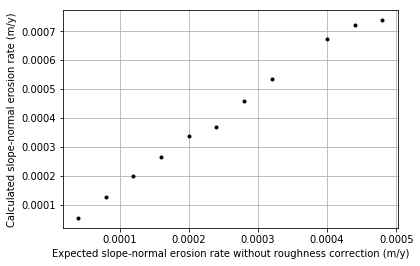

In [8]:
delta = 0.5  # cell width, m
expected_slope_normal_rate = 2.0 * delta * diss_param  # expectation without roughness correction
expected_vertical_rate = expected_slope_normal_rate / np.cos(np.radians(facet_angle))  # translate to vertical
calculated_slope_normal_rate = ero_rate * np.cos(np.radians(facet_angle))  # calculated from topography
calculated_vertical_rate = ero_rate  # calculated from topography
for i in range(len(ero_rate)):
    print((expected_slope_normal_rate[i], calculated_slope_normal_rate[i], expected_vertical_rate[i],
           calculated_vertical_rate[i], calculated_slope_normal_rate[i] / expected_slope_normal_rate[i]))
plt.plot(expected_slope_normal_rate, calculated_slope_normal_rate, 'k.')
plt.grid(True)
plt.xlabel('Expected slope-normal erosion rate without roughness correction (m/y)')
plt.ylabel('Calculated slope-normal erosion rate (m/y)')
print('Mean En ratio: ' + str(np.mean(calculated_slope_normal_rate / expected_slope_normal_rate)))
print('Mean Ev ratio: ' + str(np.mean(calculated_vertical_rate / expected_vertical_rate)))

Clearly, the actual erosion rate is higher than the rate that would be expected in the absence of a surface-roughness effect. Next, we'll read in results from a similar series of runs that use a longer domain. We can then compare the predicted and modeled angle difference for both data sets. This comparison will indicate two things: first, do the two data sets plot together, indicating (as expected) that slope length does not influence gradient for a dissolution-limited facet? second, by what factor is the actual angle difference greater than what would be expected in the absence of surface roughness?

In [9]:
filename = 'dissolution_long_domain20190311.csv'

In [10]:
# Count number of lines in file
num_lines = len(open(filename).readlines(  ))

# Create data arrays
diss_param_long = np.zeros(num_lines - 2)  # skip 2 header lines
facet_angle_long = np.zeros(num_lines - 2)

# Read data
with open(filename, 'r') as csvfile:
    myreader = csv.reader(csvfile)
    i = 0
    for row in myreader:
        print(' '.join(row))
        if i >= 2:
            diss_param_long[i-2] = row[0]
            facet_angle_long[i-2] = row[2]
        i += 1

Landlab version 1.7.0+15.g1764eb3f 
Dissolution rate parameter (1/yr) Gradient (m/m) Slope angle (deg)
0.0002 0.82404884912 39.4901895413
0.00024 0.644706866237 32.810153595
0.00028 0.534296429598 28.115431014
0.00032 0.441043524674 23.7995670076
0.00036 0.288452281903 16.0903267272
0.0004 0.201972724765 11.4185726704
0.00044 0.10976357524 6.26391395369
0.00048 0.0224836295957 1.28800007937


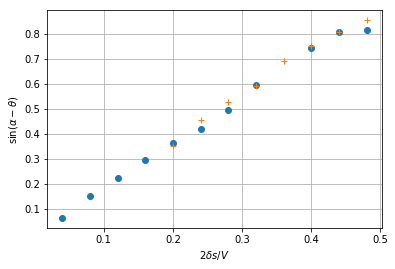

In [12]:
# Quick data plot to check linearity
V = 0.001
expected_sin_angle_diff = 2 * delta * diss_param / V
expected_sin_angle_diff_long = 2 * delta * diss_param_long / V
plt.plot(expected_sin_angle_diff, np.sin(np.radians(60.0 - facet_angle)), 'o')
plt.plot(expected_sin_angle_diff_long, np.sin(np.radians(60.0 - facet_angle_long)), '+')
plt.xlabel(r'$2 \delta s / V$')
plt.ylabel(r'$\sin ( \alpha - \theta )$')
plt.grid(True)

The linearity of the above plot means that part of the theory works: there is indeed a linear relation between the sine of the angle difference and the ratio of erosion to slip rate, and the relationship is insensitive to slope length. However, the fact that the observed slope difference is consistently greater than its predicted value implies that there is indeed a roughness effect that needs a correction. 

Next, we'll fit the coefficient $a$ in:

$\sin ( \alpha - \theta ) = \frac{2 a\delta}{V}s$.


In [13]:
# To use linalg.lstsq, we need to transpose $w$
x = expected_sin_angle_diff[:,np.newaxis]
y = np.sin(np.radians(60.0 - facet_angle))  # angle difference

# Fit with zero intercept (the "rcond" parameter supresses a
# warning)
a, _, _, _ = np.linalg.lstsq(x, y, rcond=None)
print(a)

[1.7977213]


This value of $a\approx 1.8$ matches a separate set of experiments on dissolution of a flat surface, where the actual rate is about 3.6 times $\delta s$, or 1.8 times $2 \delta s$.

Verify that the fitting parameter makes sense by plotting. The line should go through the data.

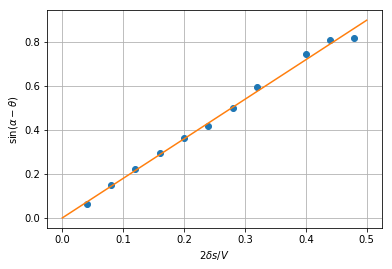

In [15]:
plt.plot(x, y, 'o')
plt.plot([0, 0.5], [0, a * 0.5])
plt.grid(True)
plt.xlabel(r'$2 \delta s / V$')
plt.ylabel(r'$\sin ( \alpha - \theta )$')
plt.grid(True)

The next step is to create a version of this plot that includes the roughness-correction factor $a\approx 1.8$. We define a dimensionless dissolution-erosion rate as:

$S' = 2 a \delta / V$.

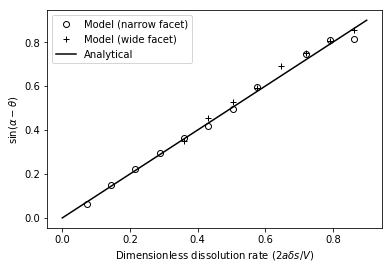

In [20]:
# expected dimensionless dissolution-erosion rate
Sprime = 1.8 * 2.0 * delta * diss_param / V
Sprime_long = 1.8 * 2.0 * delta * diss_param_long / V

sin_ang_diff = np.sin(np.radians(60.0 - facet_angle))
sin_ang_diff_long = np.sin(np.radians(60.0 - facet_angle_long))

plt.plot(Sprime, sin_ang_diff, 'ko', fillstyle='none')
plt.plot(Sprime_long, sin_ang_diff_long, 'k+')
plt.plot([0.0, 0.9], [0.0, 0.9], 'k')  # one-to-one line
plt.xlabel(r'Dimensionless dissolution rate ($2 a \delta s / V$)')
plt.ylabel(r'$\sin (\alpha - \theta)$')
plt.legend(['Model (narrow facet)', 'Model (wide facet)', 'Analytical (1:1)'])
plt.savefig('../modeling-shape-evolution/Figures/angle_vs_dissolution.pdf')

## Visualizing predicted dip angle

The following block of code produces plots of the predicted facet angle for different values of $s$.

NEXT UP: ADD PLOT OF PROFILE TO BELOW PLOT

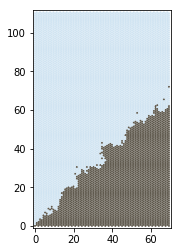

<Figure size 432x288 with 0 Axes>

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from landlab.io.native_landlab import load_grid
from grainhill import plot_hill
%matplotlib inline

run_dir = '../../ModelRuns/Dissolution/'
runs = ['dissolve_dr16']

for run_name in runs:
    g = load_grid(run_dir + run_name + '/' + run_name + '.grid')
    plot_hill(g)
    plt.savefig('frogtest.png')


(50.83267527790682, array([ 0.        , 85.92848531]))
(37.08168819476707, array([ 0.       , 52.9054242]))
(23.33070111162731, array([ 0.        , 30.19123841]))
(9.579714028487551, array([ 0.        , 11.81412231]))


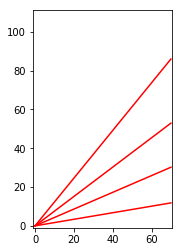

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

s = np.array([0.16, .4, 0.64, .88])
tpred = np.radians(60) - s
for t in tpred:
    x = np.array([0., 70.])
    y = x * np.tan(t)
    print((np.degrees(t), y))
    plt.plot(x, y, 'r')
    plt.axis([-1.0, 70.5, -1.0, 111.0])
    plt.gca().set_aspect('equal')
plt.savefig('predicted_angles.pdf')

Make a plot with the domain twice as long, with $S' = 0.48$:

(37.08168819476707, array([  0.        , 105.81084841]))
(23.33070111162731, array([ 0.        , 60.38247682]))


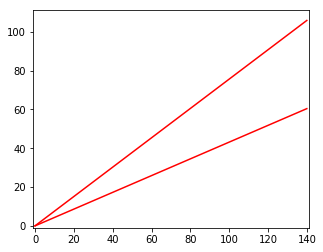

In [4]:
s = np.array([.4, .64])
tpred = np.radians(60) - s
for t in tpred:
    x = np.array([0., 140.])
    y = x * np.tan(t)
    print((np.degrees(t), y))
    plt.plot(x, y, 'r')
    plt.axis([-1.0, 141., -1.0, 111.0])
    plt.gca().set_aspect('equal')
    plt.savefig('predicted_angle_long.pdf')